In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, learning_curve

In [2]:
X = load_digits().data
y = load_digits().target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [4]:
np.bincount(y_train)

array([140, 147, 142, 147, 139, 145, 145, 142, 145, 145])

In [5]:
np.bincount(y_test)

array([38, 35, 35, 36, 42, 37, 36, 37, 29, 35])

In [21]:
def one_hot(y):
    n_classes = np.unique(y).shape[0]
    ohe_y = np.zeros((y.shape[0], n_classes))
    for row_idx, i in enumerate(y):
        for col_idx in range(n_classes):
            if i==col_idx:
                ohe_y[row_idx, col_idx] = 1
    return ohe_y

def sigmoid(input):
    return 1. / (1. + np.exp(-np.clip(input, -250, 250)))

def forward(X, w_h, w_out):
    z_h = X.dot(w_h)
    a_h = sigmoid(z_h)
    z_out = a_h.dot(w_out)
    a_out = sigmoid(z_out)
    return z_h, a_h, z_out, a_out


def NN(X, y, c, n_hidden, learning_rate, epochs):
    '''
    X - обучающая выборка
    y - метки
    c - значение лямбды регуляризации
    n_hidden - количество скрытых элементов
    learning_rate - скорость обучение
    '''
    n_output = np.unique(y).shape[0]
    X = np.column_stack((np.ones(X.shape[0]), X))
    y_ohe = one_hot(y)
    w_h = np.random.normal(loc=0.0, scale=0.1, size=(X.shape[1], n_hidden))
    w_out = np.random.normal(loc=0.0, scale=0.1, size=(n_hidden, n_output))
    cost = []
    
    for _ in range(epochs):
        
        z_h, a_h, z_out, a_out = forward(X, w_h, w_out)
        cost_ = np.sum(-y_ohe * np.log(a_out) - ((1. - y_ohe) * (np.log(1 - a_out))))
        cost.append(cost_)
        sigma_out = a_out - y_ohe
        sigma_derivative_h = a_h * (1. - a_h)
        sigma_h = np.dot(sigma_out, w_out.T) * sigma_derivative_h

        grad_w_out = a_h.T.dot(sigma_out)
        grad_w_h = X.T.dot(sigma_h)

        w_out -= grad_w_out * learning_rate
        w_h -= grad_w_h * learning_rate

    cost_ = np.sum(-y_ohe * np.log(a_out) - ((1. - y_ohe) * (np.log(1 - a_out))))
    cost.append(cost_)
    
    return cost, (w_h, w_out)

def make_predict(X, w_h, w_out):
    X = np.column_stack((np.ones(X.shape[0]), X))
    z_h, a_h, z_out, a_out = forward(X, w_h, w_out)
    return a_out

In [38]:
%%time
a_30, w = NN(X_train, y_train, 1, 30, 0.001, 50000)

CPU times: user 4min 14s, sys: 15.1 s, total: 4min 29s
Wall time: 2min 18s


In [39]:
predict = make_predict(X_test, w[0], w[1])

In [40]:
np.sum(-one_hot(y_test) * np.log(predict) - ((1. - one_hot(y_test)) * (np.log(1 - predict))))

418.64239053779886

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline

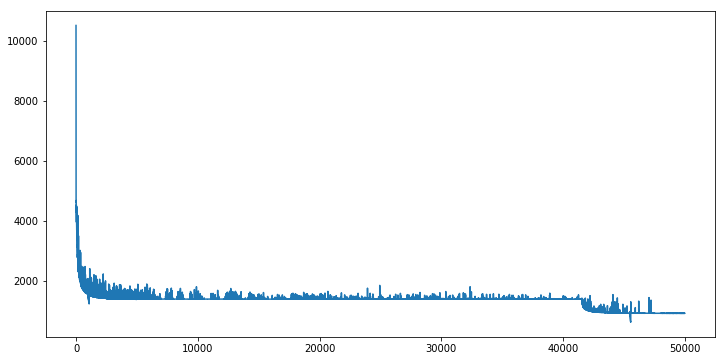

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(a_30);

In [43]:
a_30.index(min(a_30))

45564

In [33]:
%%time
a_50, w = NN(X_train, y_train, 1, 50, 0.001, 50000)

CPU times: user 5min 34s, sys: 19.7 s, total: 5min 54s
Wall time: 2min 59s


In [34]:
predict = make_predict(X_test, w[0], w[1])

In [35]:
np.sum(-one_hot(y_test) * np.log(predict) - ((1. - one_hot(y_test)) * (np.log(1 - predict))))

214.8870707102962

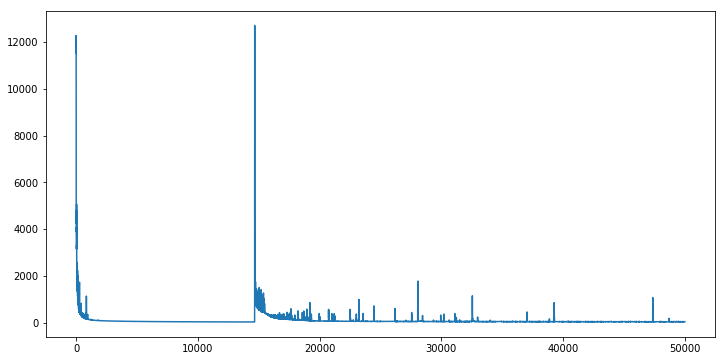

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(a_50);

In [37]:
a_50.index(min(a_50))

14651

In [44]:
from MLP import NeuralNetMLP

In [48]:
nn = NeuralNetMLP(n_hidden=30, l2=0.0, eta=0.001, epochs=1000)

In [49]:
nn.fit(X_train, y_train, X_test, y_test)

1000/1000 | Cost: 28.81 | Train/Valid Acc.: 100.00%/98.33%  

In [50]:
%%time
a_30, w = NN(X_train, y_train, 1, 30, 0.001, 1000)

CPU times: user 4.89 s, sys: 276 ms, total: 5.16 s
Wall time: 2.59 s
